In [4]:
#!/usr/bin/env python

'''
GA Data Science Q2 2016

Code walk-through 8: Logistic regression using StatsModels

* Odds and odds ratios
* Logistic regression
'''

import os

import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# Read in the Crime Survey for England and Wales 2013-2014 data
csew = pd.read_csv('../../Data/csew2013.csv')

# Define predictors and response
predictors = ['sex', 'age', 'walkdark']
# Whethere individual is victim of crime 
response = 'bcsvictim'

all_vars = predictors + [response]

# Recode missing values in 'walkdark'
csew.where(csew['walkdark'] != 8, inplace=True)

# Remove missing values
csew.dropna(subset=all_vars, inplace=True)

# Convert categorical variables to the 'category' data type
csew.sex = csew.sex.astype('category')
csew.walkdark = csew.walkdark.astype('category')

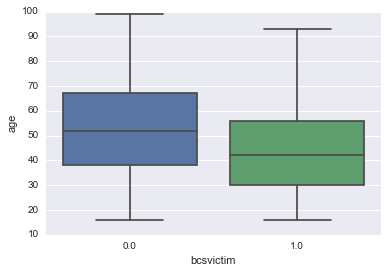

In [5]:
# Explore data visually
sns.boxplot(x='bcsvictim', y='age', data=csew)

In [6]:
# Number of men/women who experienced crime
pd.crosstab(csew.bcsvictim, csew.sex)

sex         1.0   2.0
bcsvictim            
0.0        3162  3814
1.0         623   674

In [8]:
'''
Odds and odds ratios
'''

# Probability of having experienced crime by sex
p_men = csew[csew.sex == 1].bcsvictim.mean()
p_women = csew[csew.sex == 2].bcsvictim.mean()
print(p_men)
print(p_women)

0.16459709379128137
0.1501782531194296


In [12]:
# Corresponding odds
odds_men = p_men / (1 - p_men)
odds_women = p_women / (1 - p_women)

# Alternatively…
odds_men = csew[csew.sex == 1].bcsvictim.sum() /\
           (1 - csew[csew.sex == 1].bcsvictim).sum()
odds_women = csew[csew.sex == 2].bcsvictim.sum() /\
             (1 - csew[csew.sex == 2].bcsvictim).sum()

# Odds ratio of a woman having experienced crime (compared to a man)
# Denominator is also the group of interest; probability for women to experience crime compared to men.
odds_women / odds_men

0.8969185925638499

In [9]:
'''
Logistic regression
'''

# Modelling the probability of having experienced crime by sex
# No intercept means there is no reference category
model1 = smf.logit('bcsvictim ~ -1 + sex', data=csew).fit()

model1.summary()

Optimization terminated successfully.
         Current function value: 0.434088
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              bcsvictim   No. Observations:                 8273
Model:                          Logit   Df Residuals:                     8271
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 May 2016   Pseudo R-squ.:               0.0004486
Time:                        19:17:03   Log-Likelihood:                -3591.2
converged:                       True   LL-Null:                       -3592.8
                                        LLR p-value:                   0.07260
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
sex[1.0]      -1.6244      0.044    -37.059      0.000        -1.710    -1.539
sex[2.0]      -1.7332      0.042    -41.480      0.000        -1.815    -1.651
==============================================================================
"""

In [10]:
model1.params # Regression coefficients

sex[1.0]   -1.624413
sex[2.0]   -1.733204
dtype: float64

In [14]:
# Taking the exponential of the regression coefficients returns the odds
np.exp(model1.params)

sex[1.0]    0.197027
sex[2.0]    0.176717
dtype: float64

In [15]:
odds_men

0.19702719797596457

In [16]:
odds_women

0.17671735710540115

In [17]:
# Including the intercept means one category (sex = 1) acts as reference
model2 = smf.logit('bcsvictim ~ sex', data=csew).fit()

Optimization terminated successfully.
         Current function value: 0.434088
         Iterations 6


In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              bcsvictim   No. Observations:                 8273
Model:                          Logit   Df Residuals:                     8271
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 May 2016   Pseudo R-squ.:               0.0004486
Time:                        19:19:35   Log-Likelihood:                -3591.2
converged:                       True   LL-Null:                       -3592.8
                                        LLR p-value:                   0.07260
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.6244      0.044    -37.059      0.000        -1.710    -1.539
sex[T.2.0]    -0.1088      0.061     -1.796      0.072        -0.227     0.010
==============================================================================
"""

In [19]:
model2.params

Intercept    -1.624413
sex[T.2.0]   -0.108790
dtype: float64

In [20]:
# Taking the exponential of the regression coefficients returns the odds of the
# reference category, and the OR of the outcome in the non-reference category
np.exp(model2.params)

Intercept     0.197027
sex[T.2.0]    0.896919
dtype: float64

In [21]:
odds_men

0.19702719797596457

In [22]:
odds_women / odds_men

0.8969185925638499

In [23]:
# The odds in the non-reference category are the odds in the reference category
# (intercept) multiplied by the OR in the non-reference category (coefficient)
np.prod(np.exp(model2.params))

0.17671735710540123

In [24]:
# Full model
model3 = smf.logit('bcsvictim ~ sex + age + walkdark', data=csew).fit()

Optimization terminated successfully.
         Current function value: 0.417814
         Iterations 6


In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              bcsvictim   No. Observations:                 8273
Model:                          Logit   Df Residuals:                     8267
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 May 2016   Pseudo R-squ.:                 0.03792
Time:                        19:25:23   Log-Likelihood:                -3456.6
converged:                       True   LL-Null:                       -3592.8
                                        LLR p-value:                 8.126e-57
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.5633      0.098     -5.723      0.000        -0.756    -0.370
sex[T.2.0]         -0.2903      0.066     -4.365      0.000        -0.421    -0.160
walkdark[T.2.0]     0.1737      0.078      2.232      0.026         0.021     0.326
walkdark[T.3.0]     0.4961      0.092      5.401      0.000         0.316     0.676
walkdark[T.4.0]     0.8068      0.112      7.195      0.000         0.587     1.027
age                -0.0254      0.002    -14.661      0.000        -0.029    -0.022
===================================================================================
"""

In [26]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.038     
Dependent Variable: bcsvictim        AIC:              6925.1504 
Date:               2016-05-31 19:25 BIC:              6967.2749 
No. Observations:   8273             Log-Likelihood:   -3456.6   
Df Model:           5                LL-Null:          -3592.8   
Df Residuals:       8267             LLR p-value:      8.1258e-57
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -0.5633   0.0984  -5.7225 0.0000 -0.7562 -0.3704
sex[T.2.0]       -0.2903   0.0665  -4.3650 0.0000 -0.4206 -0.1599
walkdark[T.2.0]   0.1737   0.0778   2.2317 0.0256  0.0211  0.3262
walkdark[T.3.0]   0.4961   0.0919   5.4012 0.0000  0.3161  0.6762
walkdark[T.4.0]   0.8068   0.1121   7.1952 0.0000  0.5870  1.0265
age              -0.0254   0.0017 -14.6611 0.0000 -0.0288 -0.0220
=================================================================

"""

In [28]:
model3.params

Intercept         -0.563300
sex[T.2.0]        -0.290251
walkdark[T.2.0]    0.173691
walkdark[T.3.0]    0.496124
walkdark[T.4.0]    0.806777
age               -0.025363
dtype: float64

In [29]:
model3.pvalues

Intercept          1.049420e-08
sex[T.2.0]         1.271222e-05
walkdark[T.2.0]    2.563387e-02
walkdark[T.3.0]    6.620757e-08
walkdark[T.4.0]    6.236168e-13
age                1.143608e-48
dtype: float64

In [30]:
model3.conf_int()

0         1
Intercept       -0.756229 -0.370370
sex[T.2.0]      -0.420580 -0.159923
walkdark[T.2.0]  0.021150  0.326233
walkdark[T.3.0]  0.316092  0.676156
walkdark[T.4.0]  0.587012  1.026542
age             -0.028753 -0.021972

In [31]:
#pseudo R squared tells us model is not very predictive, doesn't capture alot of the variability
model3.prsquared

0.037922896078276036

In [32]:
np.exp(model3.params)

Intercept          0.569327
sex[T.2.0]         0.748075
walkdark[T.2.0]    1.189688
walkdark[T.3.0]    1.642343
walkdark[T.4.0]    2.240675
age                0.974956
dtype: float64